In [4]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
import sklearn.datasets 
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBRegressor



In [5]:
california_housing = sklearn.datasets.fetch_california_housing()
print(california_housing)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [6]:
cal_housing_dataset=pd.DataFrame(california_housing.data,columns=california_housing.feature_names)
cal_housing_dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [7]:
target_df= pd.DataFrame(california_housing.target,columns=california_housing.target_names)
target_df

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [8]:
california_housing_df = cal_housing_dataset.join(target_df,how='outer')
california_housing_df


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [9]:
california_housing_df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

<Axes: >

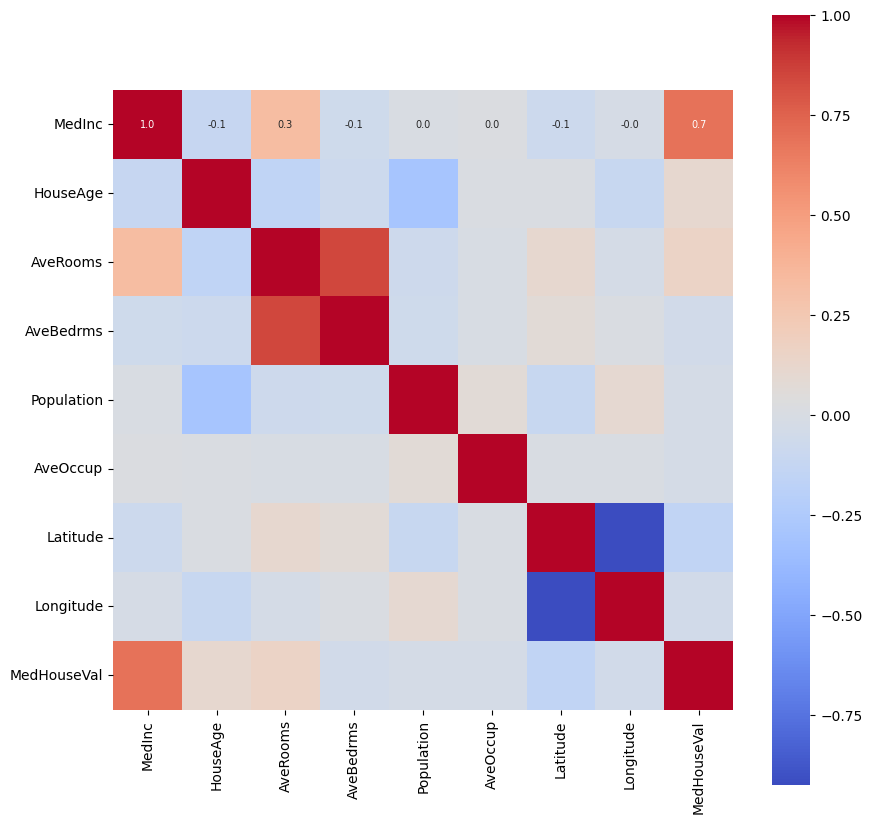

In [10]:
correlation = california_housing_df.corr()
correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation,fmt='.1f',cmap='coolwarm',annot=True,square=True,cbar=True,annot_kws={'size':7})

In [11]:
X=cal_housing_dataset
Y=target_df

In [12]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=2,train_size=0.2)


**Linear Regression**

In [13]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [14]:
Y_train_predicted = lr.predict(X_train)
Y_test_predicted= lr.predict(X_test)
Y_train_predicted

array([[0.83182413],
       [2.60160393],
       [1.21192205],
       ...,
       [1.56829866],
       [1.71866525],
       [1.22026762]])

In [15]:
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score

train_mse = mean_squared_error(Y_train , Y_train_predicted)
train_r2 = r2_score(Y_train , Y_train_predicted)
test_mse = mean_squared_error(Y_test,Y_test_predicted)
test_r2 = r2_score(Y_test,Y_test_predicted)

print('Training MSE: ',train_mse)
print('Testing MSE: ',test_mse)

print('Training r^2 :',train_r2)
print('Testing r^2 :',test_r2 )

Training MSE:  0.5273712672265282
Testing MSE:  1.1596890222000742
Training r^2 : 0.5990498667954394
Testing r^2 : 0.1315067080459945


In [16]:
xg=XGBRegressor()
xg.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [23]:
Y_train_pred = xg.predict(X_train)
Y_test_pred = xg.predict(X_test)
xg_train_mse = metrics.mean_absolute_error(Y_train,Y_train_pred)
xg_train_r2 = r2_score(Y_train,Y_train_pred)

xg_test_mse = metrics.mean_absolute_error(Y_test,Y_test_pred)
xg_test_r2 = r2_score(Y_test,Y_test_pred)
print(xg_train_mse)
print(xg_train_r2)
print(xg_test_mse)
print(xg_test_r2)

0.10345322954092608
0.9840972807893258
0.35475612159658004
0.7957803310063778


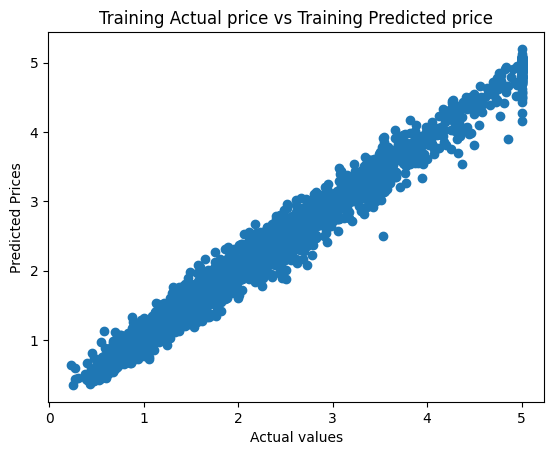

In [28]:
plt.scatter(Y_train,Y_train_pred)
plt.xlabel('Actual values')
plt.ylabel("Predicted Prices")
plt.title("Training Actual price vs Training Predicted price")
plt.show()

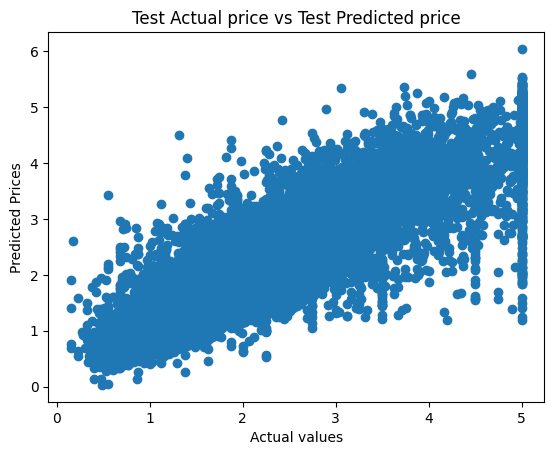

In [29]:
plt.scatter(Y_test,Y_test_pred)
plt.xlabel('Actual values')
plt.ylabel("Predicted Prices")
plt.title("Test Actual price vs Test Predicted price")
plt.show()